In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('chicago data summary Interpolated lag 12.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,3/1/2005,168.016174,5.93,40731.0,9362.0800,6.2,471401.4910,1195.605,43.50%,177440.0000,1.70%,4629,1.68,175.2
1,4/1/2005,167.616675,5.86,41006.9,9365.7575,6.1,473749.3002,1195.605,43.50%,177931.6667,1.67%,4585,2.00,177.3
2,5/1/2005,167.717165,5.72,41282.8,9369.4350,6.0,476097.1094,1195.605,43.50%,178423.3333,1.63%,4618,1.43,176.9
3,6/1/2005,167.155395,5.58,41558.7,9373.1125,6.4,478444.9186,1195.605,43.50%,178915.0000,1.60%,4476,1.44,177.0
4,7/1/2005,166.556535,5.70,41834.6,9376.7900,6.0,480792.7278,1195.605,43.47%,179127.6667,1.60%,4920,2.00,177.3
5,8/1/2005,166.019696,5.82,42110.5,9380.4675,5.5,483140.5370,1195.605,43.43%,179340.3333,1.60%,5641,1.80,179.0
6,9/1/2005,166.452195,5.77,42386.4,9384.1450,5.5,485488.3462,1195.605,43.40%,179553.0000,1.60%,4897,1.71,183.0
7,10/1/2005,166.481693,6.07,42662.3,9387.8225,5.1,487836.1554,1195.605,43.30%,180335.6667,1.60%,4657,1.75,182.9
8,11/1/2005,166.513208,6.33,42938.2,9391.5000,5.2,490183.9646,1195.605,43.20%,181118.3333,1.60%,4448,1.85,181.7
9,12/1/2005,166.958777,6.27,43214.1,9395.1775,5.1,492531.7738,1195.605,43.10%,181901.0000,1.60%,3988,2.01,180.1


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,168.016174,5.93,40731.0,9362.0800,6.2,471401.4910,1195.605,177440.0000,4629,1.68,175.2,43.50,1.70
1,4/1/2005,167.616675,5.86,41006.9,9365.7575,6.1,473749.3002,1195.605,177931.6667,4585,2.00,177.3,43.50,1.67
2,5/1/2005,167.717165,5.72,41282.8,9369.4350,6.0,476097.1094,1195.605,178423.3333,4618,1.43,176.9,43.50,1.63
3,6/1/2005,167.155395,5.58,41558.7,9373.1125,6.4,478444.9186,1195.605,178915.0000,4476,1.44,177.0,43.50,1.60
4,7/1/2005,166.556535,5.70,41834.6,9376.7900,6.0,480792.7278,1195.605,179127.6667,4920,2.00,177.3,43.47,1.60


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,40731.0,9362.080000,6.2,471401.4910,1195.605000,177440.0000,4629,1.68,175.200,43.50,1.70
1,5.86,41006.9,9365.757500,6.1,473749.3002,1195.605000,177931.6667,4585,2.00,177.300,43.50,1.67
2,5.72,41282.8,9369.435000,6.0,476097.1094,1195.605000,178423.3333,4618,1.43,176.900,43.50,1.63
3,5.58,41558.7,9373.112500,6.4,478444.9186,1195.605000,178915.0000,4476,1.44,177.000,43.50,1.60
4,5.70,41834.6,9376.790000,6.0,480792.7278,1195.605000,179127.6667,4920,2.00,177.300,43.47,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...
137,3.44,57456.0,9522.258417,5.7,651522.2948,1038.266667,164748.3333,1519,1.67,206.327,36.43,2.20
138,3.46,57631.0,9520.629333,5.5,652944.4427,1055.070000,164466.0000,1822,1.64,207.375,36.30,2.20
139,3.47,57806.0,9519.000250,5.5,654366.5905,1071.873333,164465.6667,2955,1.76,207.696,36.23,2.17
140,3.77,57981.0,9517.371167,5.0,655788.7383,1088.676667,164465.3333,1163,1.64,207.683,36.17,2.13


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),142.0,4.834930,1.054379,3.350,3.925000,4.555000,5.927500,6.7600
Personal_Income,142.0,48528.781690,4837.070133,40731.000,44635.187498,46439.208335,52634.041668,58156.0000
Resident_Population,142.0,9508.037623,53.523086,9362.080,9484.277500,9525.558542,9549.142000,9580.5670
Unemployment_Rate,142.0,7.440141,2.207179,3.700,5.500000,6.550000,9.600000,12.2000
GDP,142.0,554013.199137,55132.695624,471401.491,508243.582200,533813.644150,602829.299825,657210.8862
Crime_Rate,142.0,1057.651335,116.039838,884.000,955.836875,1035.700583,1181.823833,1208.6010
Median_Debt,142.0,179841.901408,9767.856702,164465.000,170468.499975,180780.333300,189297.250000,193843.0000
New_Structures,142.0,1684.676056,1334.838458,235.000,697.250000,1119.500000,2153.250000,5641.0000
Economic_Conditions_Index,142.0,1.033028,1.897479,-6.130,1.065000,1.720000,2.027500,2.7800
CPI all items less shelter,142.0,198.252197,10.561420,175.200,190.182500,201.363500,207.240000,213.7490


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.038593,-1.612088,-2.727003,-0.561867,-1.498416,1.188847,-0.245899,2.205753,0.340964,-2.182680,0.683541,-1.173021
1,0.972203,-1.555049,-2.658294,-0.607174,-1.455831,1.188847,-0.195563,2.172790,0.509609,-1.983843,0.683541,-1.187262
2,0.839424,-1.498010,-2.589586,-0.652480,-1.413247,1.188847,-0.145228,2.197512,0.209210,-2.021717,0.683541,-1.206249
3,0.706644,-1.440972,-2.520877,-0.471253,-1.370662,1.188847,-0.094893,2.091132,0.214480,-2.012248,0.683541,-1.220490
4,0.820455,-1.383933,-2.452168,-0.652480,-1.328077,1.188847,-0.073121,2.423757,0.509609,-1.983843,0.672878,-1.220490
...,...,...,...,...,...,...,...,...,...,...,...,...
137,-1.322987,1.845584,0.265695,-0.788400,1.768626,-0.167052,-1.545228,-0.124117,0.335694,0.764557,-1.829216,-0.935676
138,-1.304019,1.881763,0.235258,-0.879014,1.794421,-0.022245,-1.574133,0.102877,0.319883,0.863786,-1.875420,-0.935676
139,-1.294534,1.917942,0.204821,-0.879014,1.820216,0.122561,-1.574167,0.951669,0.383125,0.894179,-1.900299,-0.949916
140,-1.010007,1.954121,0.174384,-1.105547,1.846011,0.267368,-1.574201,-0.390816,0.319883,0.892948,-1.921623,-0.968904


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

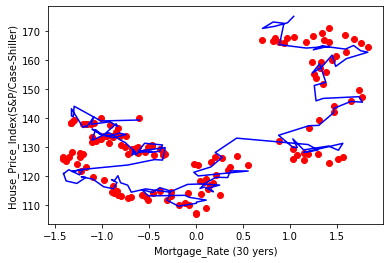

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 2.67
Accuracy: 97.99 %.


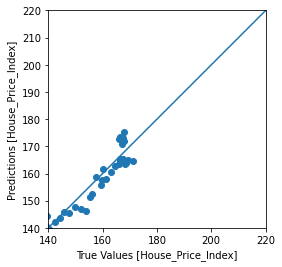

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9636917696252582

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,2.018450
1,-29.996055
2,5.026290
3,1.199738
4,38.411317
5,4.330831
6,-11.183244
7,4.055598
8,4.409932
9,-12.500529


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[175.21828367 172.98859854 171.79173937 171.04881548 173.27124662
 172.82024866 165.43520511 164.27516657 164.84593083 164.54567243
 163.6686524  165.11667092 164.67011418 163.91769347 165.17523197
 163.34868109 162.84453782 160.61868558 157.96703869 161.84070894
 157.63898634 155.69817754 158.87232322 152.45045642 151.37346263
 146.07309024 146.9130113  147.50534038 145.6061514  145.87431651
 143.47967962 142.0574848  137.60524377 137.48904766 134.19113754
 130.05292918 129.93835106 132.95503287 129.15699772 130.46787383
 129.02830399 131.41097665 128.25393308 129.10007828 131.00596391
 133.20139459 128.23401488 126.60631248 123.24779512 121.42104101
 120.15902348 121.87255813 121.928686   119.59959273 119.72467531
 117.89429833 115.84767168 116.32694691 114.70086566 115.69752096
 115.96227207 117.01741664 117.40800301 117.24449675 114.86092558
 116.11201593 114.43197574 115.41178654 113.27751658 113.48332432
 112.78773657 111.83490189 111.13911769 110.73437576 109.72248481
 111.79726

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,175.218284
1,172.988599
2,171.791739
3,171.048815
4,173.271247
...,...
137,140.844489
138,140.602437
139,144.208802
140,139.128789


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,1.361058,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
Personal_Income,-1.612088,-1.555049,-1.498010,-1.440972,-1.383933,-1.326894,-1.269856,-1.212817,-1.155779,-1.098740,...,1.664689,1.700868,1.737047,1.773226,1.809405,1.845584,1.881763,1.917942,1.954121,1.990300
Resident_Population,-2.727003,-2.658294,-2.589586,-2.520877,-2.452168,-2.383460,-2.314751,-2.246042,-2.177334,-2.108625,...,0.417880,0.387443,0.357006,0.326569,0.296132,0.265695,0.235258,0.204821,0.174384,0.143946
Unemployment_Rate,-0.561867,-0.607174,-0.652480,-0.471253,-0.652480,-0.879014,-0.879014,-1.060241,-1.014934,-1.060241,...,-0.561867,-0.743094,-0.969627,-0.652480,-0.743094,-0.788400,-0.879014,-0.879014,-1.105547,-1.060241
GDP,-1.498416,-1.455831,-1.413247,-1.370662,-1.328077,-1.285492,-1.242908,-1.200323,-1.157738,-1.115154,...,1.639651,1.665446,1.691241,1.717036,1.742831,1.768626,1.794421,1.820216,1.846011,1.871806
Crime_Rate,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,...,-0.891085,-0.746278,-0.601472,-0.456665,-0.311858,-0.167052,-0.022245,0.122561,0.267368,0.412175
Median_Debt,-0.245899,-0.195563,-0.145228,-0.094893,-0.073121,-0.051349,-0.029577,0.050550,0.130677,0.210804,...,-1.302323,-1.364022,-1.425721,-1.487420,-1.516324,-1.545228,-1.574133,-1.574167,-1.574201,-1.574235
New_Structures,2.205753,2.172790,2.197512,2.091132,2.423757,2.963897,2.406526,2.226729,2.070156,1.725545,...,0.169552,-0.461236,-0.151836,-0.515925,0.233979,-0.124117,0.102877,0.951669,-0.390816,-0.458989
Economic_Conditions_Index,0.340964,0.509609,0.209210,0.214480,0.509609,0.404206,0.356774,0.377855,0.430556,0.514879,...,0.272452,0.420016,0.098537,0.182859,0.446367,0.335694,0.319883,0.383125,0.319883,0.161779
CPI all items less shelter,-2.182680,-1.983843,-2.021717,-2.012248,-1.983843,-1.822880,-1.444143,-1.453611,-1.567232,-1.718727,...,0.682276,0.848257,0.851666,0.902417,0.709545,0.764557,0.863786,0.894179,0.892948,0.878367


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,132,133,134,135,136,137,138,139,140,141
0,Mortgage_Rate (30 yers),1.038593,0.972203,0.839424,0.706644,0.820455,0.934266,0.886845,1.171373,1.417963,...,-1.085881,-1.161755,-1.171239,-1.199692,-1.322987,-1.322987,-1.304019,-1.294534,-1.010007,-0.602184
1,Personal_Income,-1.612088,-1.555049,-1.498010,-1.440972,-1.383933,-1.326894,-1.269856,-1.212817,-1.155779,...,1.664689,1.700868,1.737047,1.773226,1.809405,1.845584,1.881763,1.917942,1.954121,1.990300
2,Resident_Population,-2.727003,-2.658294,-2.589586,-2.520877,-2.452168,-2.383460,-2.314751,-2.246042,-2.177334,...,0.417880,0.387443,0.357006,0.326569,0.296132,0.265695,0.235258,0.204821,0.174384,0.143946
3,Unemployment_Rate,-0.561867,-0.607174,-0.652480,-0.471253,-0.652480,-0.879014,-0.879014,-1.060241,-1.014934,...,-0.561867,-0.743094,-0.969627,-0.652480,-0.743094,-0.788400,-0.879014,-0.879014,-1.105547,-1.060241
4,GDP,-1.498416,-1.455831,-1.413247,-1.370662,-1.328077,-1.285492,-1.242908,-1.200323,-1.157738,...,1.639651,1.665446,1.691241,1.717036,1.742831,1.768626,1.794421,1.820216,1.846011,1.871806
5,Crime_Rate,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,1.188847,...,-0.891085,-0.746278,-0.601472,-0.456665,-0.311858,-0.167052,-0.022245,0.122561,0.267368,0.412175
6,Median_Debt,-0.245899,-0.195563,-0.145228,-0.094893,-0.073121,-0.051349,-0.029577,0.050550,0.130677,...,-1.302323,-1.364022,-1.425721,-1.487420,-1.516324,-1.545228,-1.574133,-1.574167,-1.574201,-1.574235
7,New_Structures,2.205753,2.172790,2.197512,2.091132,2.423757,2.963897,2.406526,2.226729,2.070156,...,0.169552,-0.461236,-0.151836,-0.515925,0.233979,-0.124117,0.102877,0.951669,-0.390816,-0.458989
8,Economic_Conditions_Index,0.340964,0.509609,0.209210,0.214480,0.509609,0.404206,0.356774,0.377855,0.430556,...,0.272452,0.420016,0.098537,0.182859,0.446367,0.335694,0.319883,0.383125,0.319883,0.161779
9,CPI all items less shelter,-2.182680,-1.983843,-2.021717,-2.012248,-1.983843,-1.822880,-1.444143,-1.453611,-1.567232,...,0.682276,0.848257,0.851666,0.902417,0.709545,0.764557,0.863786,0.894179,0.892948,0.878367


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI all items less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),2.018450
1,Personal_Income,-29.996055
2,Resident_Population,5.026290
3,Unemployment_Rate,1.199738
4,GDP,38.411317
5,Crime_Rate,4.330831
6,Median_Debt,-11.183244
7,New_Structures,4.055598
8,Economic_Conditions_Index,4.409932
9,CPI all items less shelter,-12.500529


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

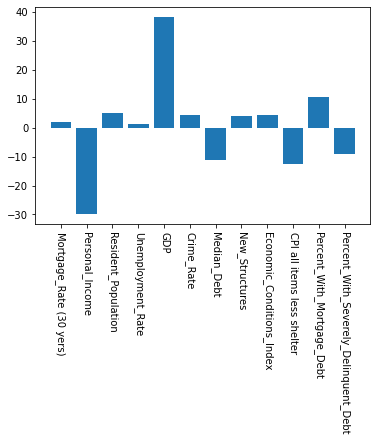

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter
0,1/1/2017,137.852991,4.15,58331.00000,9514.11300,5.8,658633.0340,1104.928333,36.20%,164522.6667,2.07%,700,1.84,208.956
1,2/1/2017,138.150301,4.17,58606.91667,9511.61675,5.4,661354.3159,1104.376667,36.30%,164580.3333,2.03%,1623,1.92,209.346
2,3/1/2017,138.331680,4.20,58882.83333,9509.12050,4.7,664075.5978,1103.825000,36.40%,164638.0000,2.00%,1165,1.70,209.426
3,4/1/2017,138.204074,4.05,59158.75000,9506.62425,4.5,666796.8798,1103.273333,36.37%,164650.0000,1.93%,2671,1.37,210.220
4,5/1/2017,138.150359,4.01,59434.66667,9504.12800,4.4,669518.1617,1102.721667,36.33%,164662.0000,1.87%,1201,1.43,209.999
5,6/1/2017,138.125941,3.90,59710.58333,9501.63175,5.1,672239.4436,1102.170000,36.30%,164674.0000,1.80%,3207,1.43,209.434
6,7/1/2017,138.347211,3.97,59986.50000,9499.13550,5.1,674960.7255,1101.618333,36.13%,164728.6667,1.80%,1140,1.44,210.359
7,8/1/2017,138.546276,3.88,60262.41667,9496.63925,5.3,677682.0074,1101.066667,35.97%,164783.3333,1.80%,1785,1.56,211.010
8,9/1/2017,139.001794,3.81,60538.33333,9494.14300,4.6,680403.2893,1100.515000,35.80%,164838.0000,1.80%,1810,1.79,211.699
9,10/1/2017,139.375383,3.90,60814.25000,9491.64675,4.5,683124.5713,1099.963333,35.70%,164832.3333,1.80%,1895,1.75,210.498


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1/1/2017,137.852991,4.15,58331.00000,9514.11300,5.8,658633.0340,1104.928333,164522.6667,700,1.84,208.956,36.20,2.07
1,2/1/2017,138.150301,4.17,58606.91667,9511.61675,5.4,661354.3159,1104.376667,164580.3333,1623,1.92,209.346,36.30,2.03
2,3/1/2017,138.331680,4.20,58882.83333,9509.12050,4.7,664075.5978,1103.825000,164638.0000,1165,1.70,209.426,36.40,2.00
3,4/1/2017,138.204074,4.05,59158.75000,9506.62425,4.5,666796.8798,1103.273333,164650.0000,2671,1.37,210.220,36.37,1.93
4,5/1/2017,138.150359,4.01,59434.66667,9504.12800,4.4,669518.1617,1102.721667,164662.0000,1201,1.43,209.999,36.33,1.87


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,4.15,58331.00000,9514.11300,5.8,658633.0340,1104.928333,164522.6667,700,1.84,208.956,36.20,2.07
1,4.17,58606.91667,9511.61675,5.4,661354.3159,1104.376667,164580.3333,1623,1.92,209.346,36.30,2.03
2,4.20,58882.83333,9509.12050,4.7,664075.5978,1103.825000,164638.0000,1165,1.70,209.426,36.40,2.00
3,4.05,59158.75000,9506.62425,4.5,666796.8798,1103.273333,164650.0000,2671,1.37,210.220,36.37,1.93
4,4.01,59434.66667,9504.12800,4.4,669518.1617,1102.721667,164662.0000,1201,1.43,209.999,36.33,1.87
5,3.90,59710.58333,9501.63175,5.1,672239.4436,1102.170000,164674.0000,3207,1.43,209.434,36.30,1.80
6,3.97,59986.50000,9499.13550,5.1,674960.7255,1101.618333,164728.6667,1140,1.44,210.359,36.13,1.80
7,3.88,60262.41667,9496.63925,5.3,677682.0074,1101.066667,164783.3333,1785,1.56,211.010,35.97,1.80
8,3.81,60538.33333,9494.14300,4.6,680403.2893,1100.515000,164838.0000,1810,1.79,211.699,35.80,1.80
9,3.90,60814.25000,9491.64675,4.5,683124.5713,1099.963333,164832.3333,1895,1.75,210.498,35.70,1.80


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,3.992500,0.125635,3.81000,3.900000,3.960000,4.075000,4.200000
Personal_Income,12.0,59848.541667,994.831689,58331.00000,59089.770832,59848.541665,60607.312497,61366.083330
Resident_Population,12.0,9500.383625,9.000357,9486.65425,9493.518938,9500.383625,9507.248312,9514.113000
Unemployment_Rate,12.0,4.850000,0.473862,4.40000,4.475000,4.650000,5.150000,5.800000
GDP,12.0,673600.084550,9811.721494,658633.03400,666116.559300,673600.084550,681083.609800,688567.135100
Crime_Rate,12.0,1101.894167,1.989062,1098.86000,1100.377083,1101.894167,1103.411250,1104.928333
Median_Debt,12.0,164713.083333,107.527970,164522.66670,164647.000000,164701.333350,164822.416675,164838.000000
New_Structures,12.0,1699.583333,685.326393,700.00000,1192.000000,1661.000000,1831.250000,3207.000000
Economic_Conditions_Index,12.0,1.671667,0.214172,1.37000,1.437500,1.725000,1.852500,1.940000
CPI all items less shelter,12.0,210.201333,0.817613,208.95600,209.432000,210.289500,210.626000,211.699000


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI all items less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.649605,2.026478,0.113509,-0.743094,1.897601,0.407420,-1.568331,-0.737674,0.425286,1.013481,-1.910961,-0.997385
1,-0.630636,2.083521,0.066871,-0.924320,1.946959,0.402666,-1.562428,-0.046205,0.467447,1.050408,-1.875420,-1.016373
2,-0.602184,2.140563,0.020232,-1.241467,1.996318,0.397912,-1.556524,-0.389318,0.351504,1.057983,-1.839879,-1.030614
3,-0.744447,2.197605,-0.026407,-1.332081,2.045677,0.393158,-1.555295,0.738909,0.177589,1.133162,-1.850541,-1.063842
4,-0.782384,2.254647,-0.073046,-1.377387,2.095036,0.388404,-1.554067,-0.362348,0.209210,1.112237,-1.864757,-1.092323
5,-0.886711,2.311689,-0.119684,-1.060241,2.144394,0.383650,-1.552838,1.140456,0.209210,1.058741,-1.875420,-1.125552
6,-0.820322,2.368731,-0.166323,-1.060241,2.193753,0.378896,-1.547242,-0.408046,0.214480,1.146323,-1.935840,-1.125552
7,-0.905680,2.425773,-0.212962,-0.969627,2.243112,0.374142,-1.541645,0.075158,0.277722,1.207963,-1.992705,-1.125552
8,-0.972070,2.482815,-0.259601,-1.286774,2.292471,0.369387,-1.536048,0.093887,0.398935,1.273200,-2.053125,-1.125552
9,-0.886711,2.539857,-0.306239,-1.332081,2.341829,0.364633,-1.536629,0.157565,0.377855,1.159485,-2.088666,-1.125552


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[138.25447677 141.01028007 139.05367083 141.62719011 137.45187403
 144.48577704 136.50106572 137.17582743 135.68930472 136.95728136
 134.91888211 136.11916159]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,138.254477
1,141.010280
2,139.053671
3,141.627190
4,137.451874
5,144.485777
6,136.501066
7,137.175827
8,135.689305
9,136.957281
